In [1]:
import os

import torch

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
from PIL import Image
from torchvision import transforms
from d2l import torch as d2l
d2l.set_figsize()

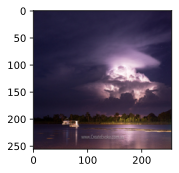

In [2]:
HR_img_path = os.path.join('..', 'datasets', 'train')
LR_img_path = os.path.join('.', 'LR')

img = d2l.Image.open(HR_img_path + os.path.join('\\2013-11-08 16_45_24.jpg'))
d2l.plt.imshow(img)

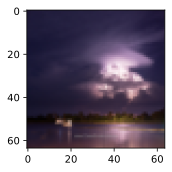

In [3]:
lr_img = transforms.Compose([
    transforms.Resize(128 // 2)
])(img)
d2l.plt.imshow(lr_img)

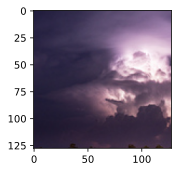

In [4]:
hr_img = transforms.Compose([
    transforms.CenterCrop(128)
])(img)
d2l.plt.imshow(hr_img)

In [5]:
import glob
origin_img_list = glob.glob('../datasets/train/*.*')
origin_img_list

['../datasets/train\\2013-11-08 16_45_24.jpg',
 '../datasets/train\\2013-11-10 00_51_18.jpg',
 '../datasets/train\\2013-11-10 06_42_01.jpg',
 '../datasets/train\\2013-11-10 07_43_23.jpg',
 '../datasets/train\\2013-11-10 12_45_41.jpg',
 '../datasets/train\\2013-11-10 19_30_53.jpg',
 '../datasets/train\\2013-11-10 20_27_52.jpg',
 '../datasets/train\\2013-11-11 06_35_27.jpg',
 '../datasets/train\\2013-11-11 08_50_18.jpg',
 '../datasets/train\\2013-11-11 12_10_46.jpg',
 '../datasets/train\\2013-11-11 22_03_00.jpg',
 '../datasets/train\\2013-11-12 01_54_20.jpg',
 '../datasets/train\\2013-11-12 10_29_19.jpg',
 '../datasets/train\\2013-11-12 16_58_40.jpg',
 '../datasets/train\\2013-11-13 08_43_01.jpg',
 '../datasets/train\\2013-11-14 01_44_20.jpg',
 '../datasets/train\\2013-11-14 07_02_49.jpg',
 '../datasets/train\\2013-11-14 07_04_51.jpg',
 '../datasets/train\\2013-11-14 12_47_50.jpg',
 '../datasets/train\\2013-11-14 14_11_02.jpg',
 '../datasets/train\\2013-11-16 04_17_00.jpg',
 '../datasets

In [6]:
idx = 0
for img_path in origin_img_list:
    hr_img = Image.open(img_path)
    lr_img = transforms.Compose([transforms.Resize(128 // 2)])(hr_img)
    hr_img.save('HR/' + str(idx) + '.jpg')
    lr_img.save('LR/' + str(idx) + '.jpg')
    idx += 1

In [26]:
import glob
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import transforms

class ImgLoader(Dataset):
    def __init__(self, root_path='../super_resolution'):
        self.transformer = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            )
        ])
        self.lr_list = sorted(glob.glob(root_path + '/LR/*.*'))
        self.hr_list = sorted(glob.glob(root_path + '/HR/*.*'))

    def __len__(self):
        return min(len(self.lr_list), len(self.hr_list))

    def __getitem__(self, index):
        return {
            'lr_img_path': self.lr_list[index],
            'hr_img_path': self.hr_list[index]
        }


loader = DataLoader(ImgLoader(),
                    batch_size=4, shuffle=True, drop_last=True)
for i, dicts in enumerate(loader):
    print("===============================")
    print('lr_path = ')
    print(dicts['lr_img_path'])
    print('hr_path = ')
    print(dicts['hr_img_path'])
    print("===============================")

lr_path = 
['../super_resolution/LR\\163.jpg', '../super_resolution/LR\\2191.jpg', '../super_resolution/LR\\2929.jpg', '../super_resolution/LR\\869.jpg']
hr_path = 
['../super_resolution/HR\\163.jpg', '../super_resolution/HR\\2191.jpg', '../super_resolution/HR\\2929.jpg', '../super_resolution/HR\\869.jpg']
lr_path = 
['../super_resolution/LR\\4867.jpg', '../super_resolution/LR\\5989.jpg', '../super_resolution/LR\\1881.jpg', '../super_resolution/LR\\5607.jpg']
hr_path = 
['../super_resolution/HR\\4867.jpg', '../super_resolution/HR\\5989.jpg', '../super_resolution/HR\\1881.jpg', '../super_resolution/HR\\5607.jpg']
lr_path = 
['../super_resolution/LR\\6275.jpg', '../super_resolution/LR\\5147.jpg', '../super_resolution/LR\\3493.jpg', '../super_resolution/LR\\965.jpg']
hr_path = 
['../super_resolution/HR\\6275.jpg', '../super_resolution/HR\\5147.jpg', '../super_resolution/HR\\3493.jpg', '../super_resolution/HR\\965.jpg']
lr_path = 
['../super_resolution/LR\\4502.jpg', '../super_resolution/L

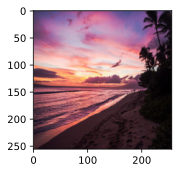

In [13]:
import model_g
import torch
import torchvision.transforms
img_hr_path = 'E:\毕设\style_transfer\learn_gan\CycleGan\datasets\\test\\2014-08-01 22_38_22.jpg'
hr_img = Image.open(img_hr_path)
hr_img.show()

In [3]:
device = torch.device('cuda:0')
generator = model_g.Generator()
param_dict = torch.load('./output/dicts.pt')
generator.load_state_dict(param_dict['generator'])
generator.to(device)
generator.eval()
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

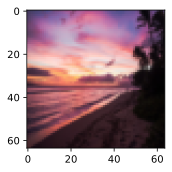

In [16]:
lr_img = transforms.Compose([
    transforms.Resize(128 * 2)
])(hr_img)
lr_img.show()

In [17]:
img = transform(lr_img).to(device)
pre = generator(img[None, ...])[0]

def UnNormalize(img, mean=None, std=None):
        if mean is None:
            mean = [0.485, 0.456, 0.406]
        if std is None:
            std = [0.229, 0.224, 0.225]
        for i in range(3):
            img[i] = std[i]*img[i] + mean[i]
        return img

pre = UnNormalize(pre).cpu().clamp(0.0, 1.0)
sr_img = transforms.ToPILImage()(pre)
sr_img.show()